In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import make_blobs
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### We dont have any null values in our dataset.

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Text(0.5, 0, 'Health')

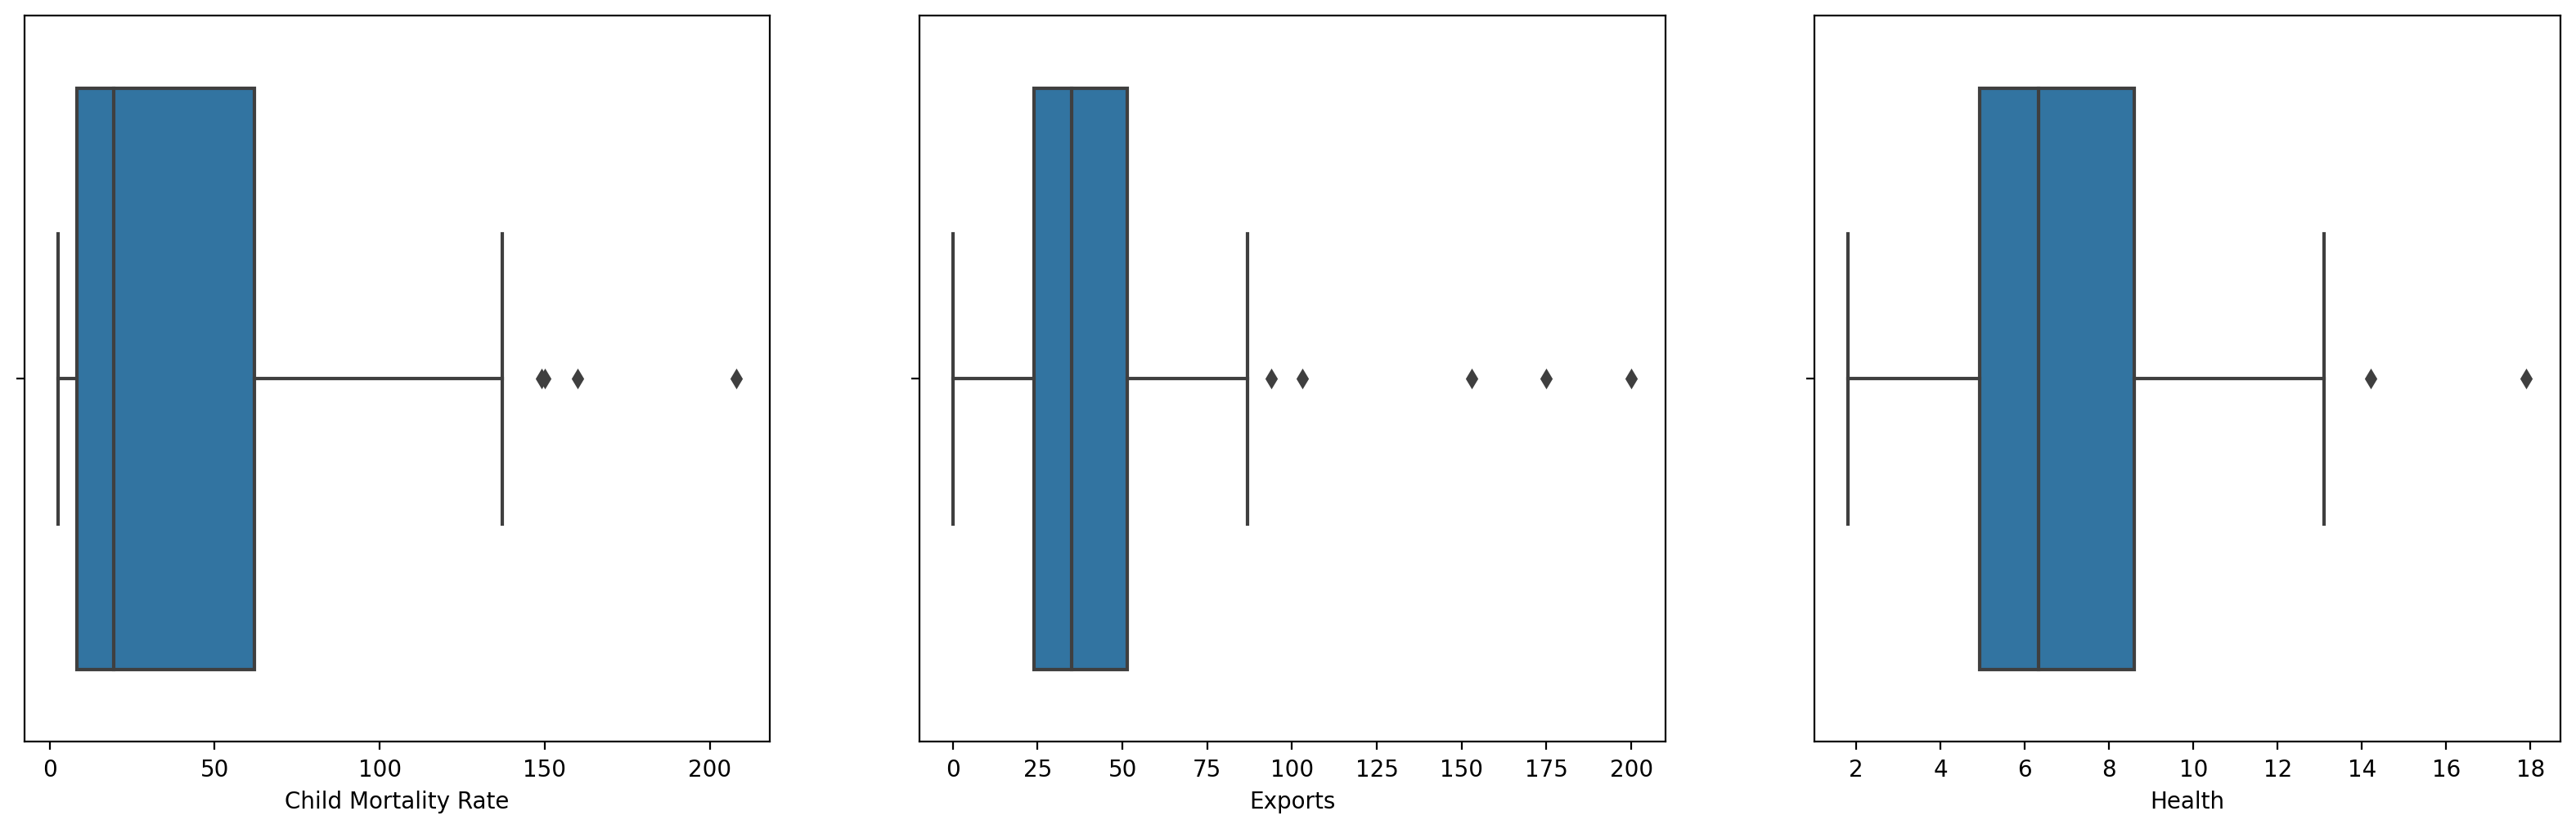

In [7]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='child_mort', data=data)
plt.xlabel('Child Mortality Rate')

plt.subplot(3,3,2)
sns.boxplot(x='exports', data=data)
plt.xlabel('Exports')

plt.subplot(3,3,3)
sns.boxplot(x='health', data=data)
plt.xlabel('Health')


Text(0.5, 0, 'Inflation')

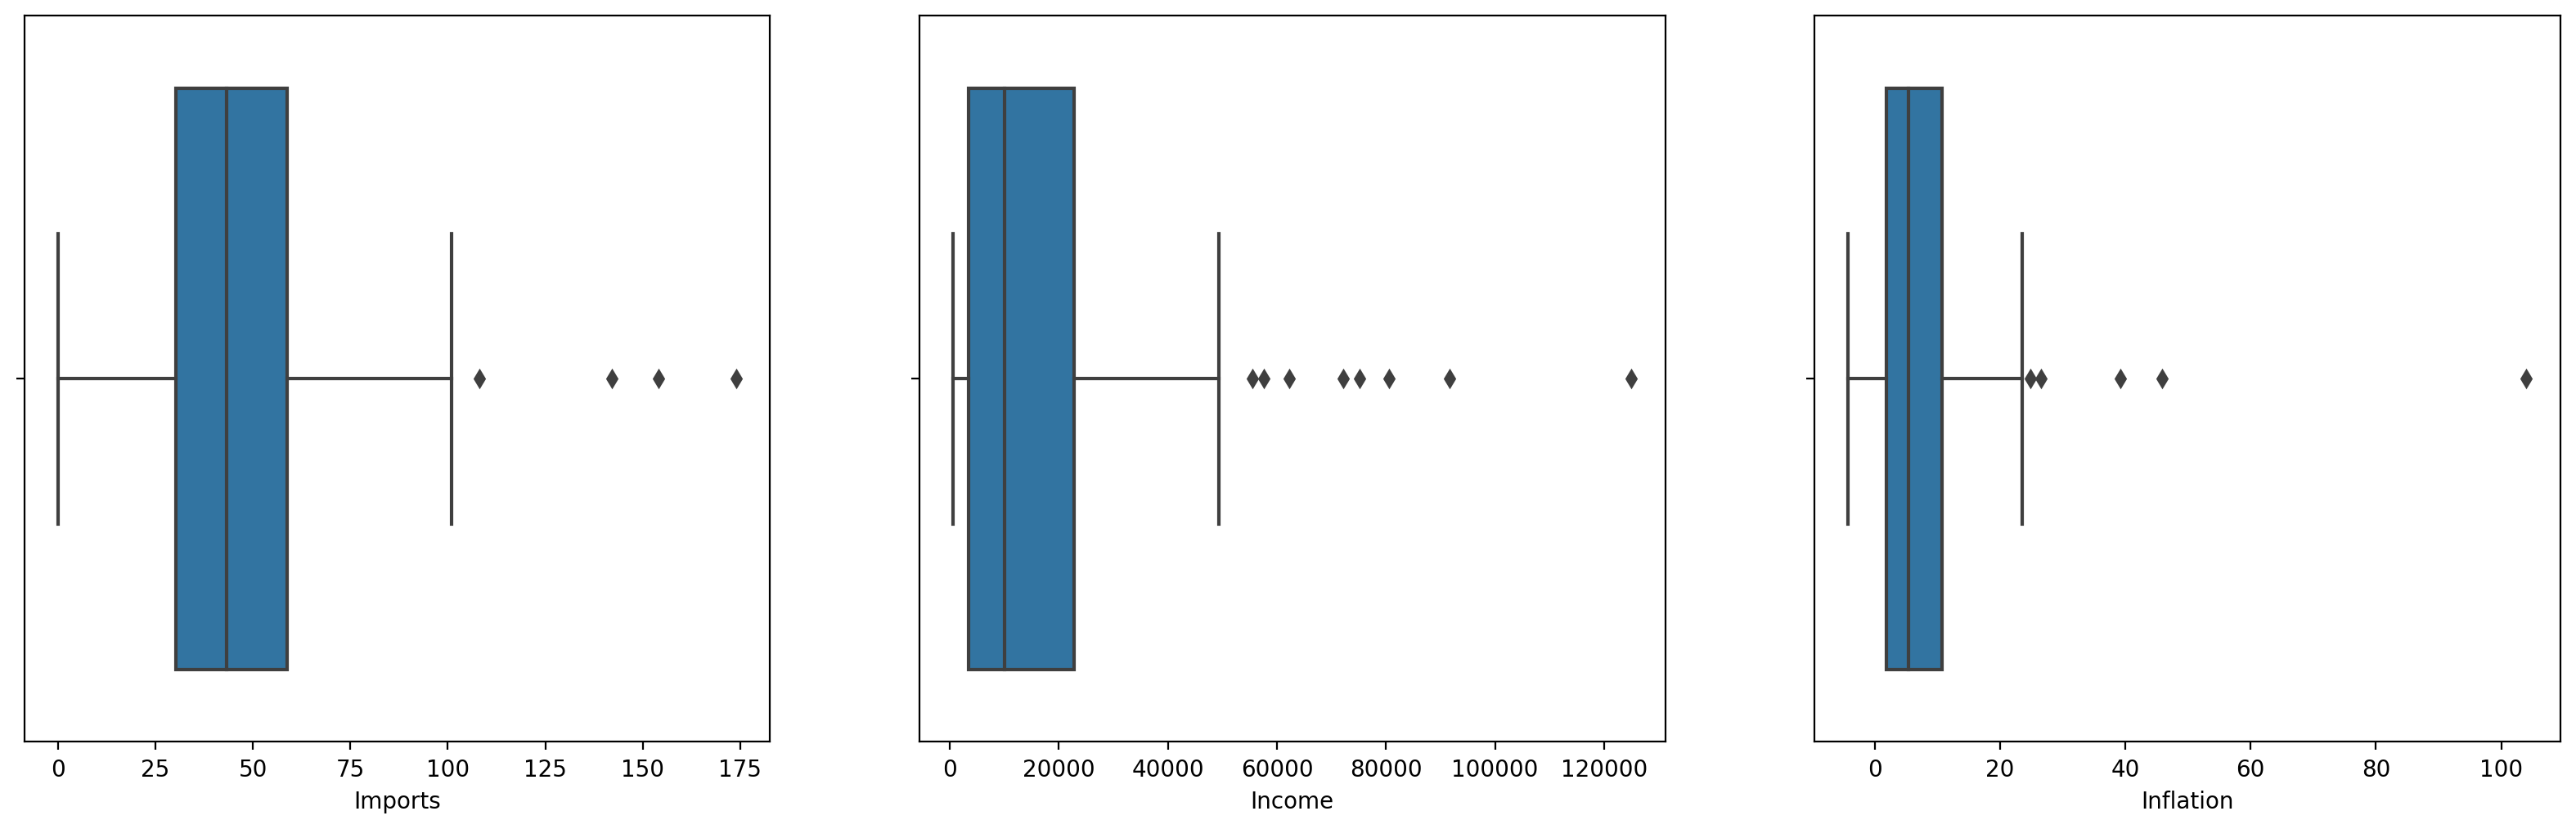

In [8]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='imports', data=data)
plt.xlabel('Imports')

plt.subplot(3,3,2)
sns.boxplot(x='income', data=data)
plt.xlabel('Income')

plt.subplot(3,3,3)
sns.boxplot(x='inflation', data=data)
plt.xlabel('Inflation')



Text(0.5, 0, 'GDP Per Capita')

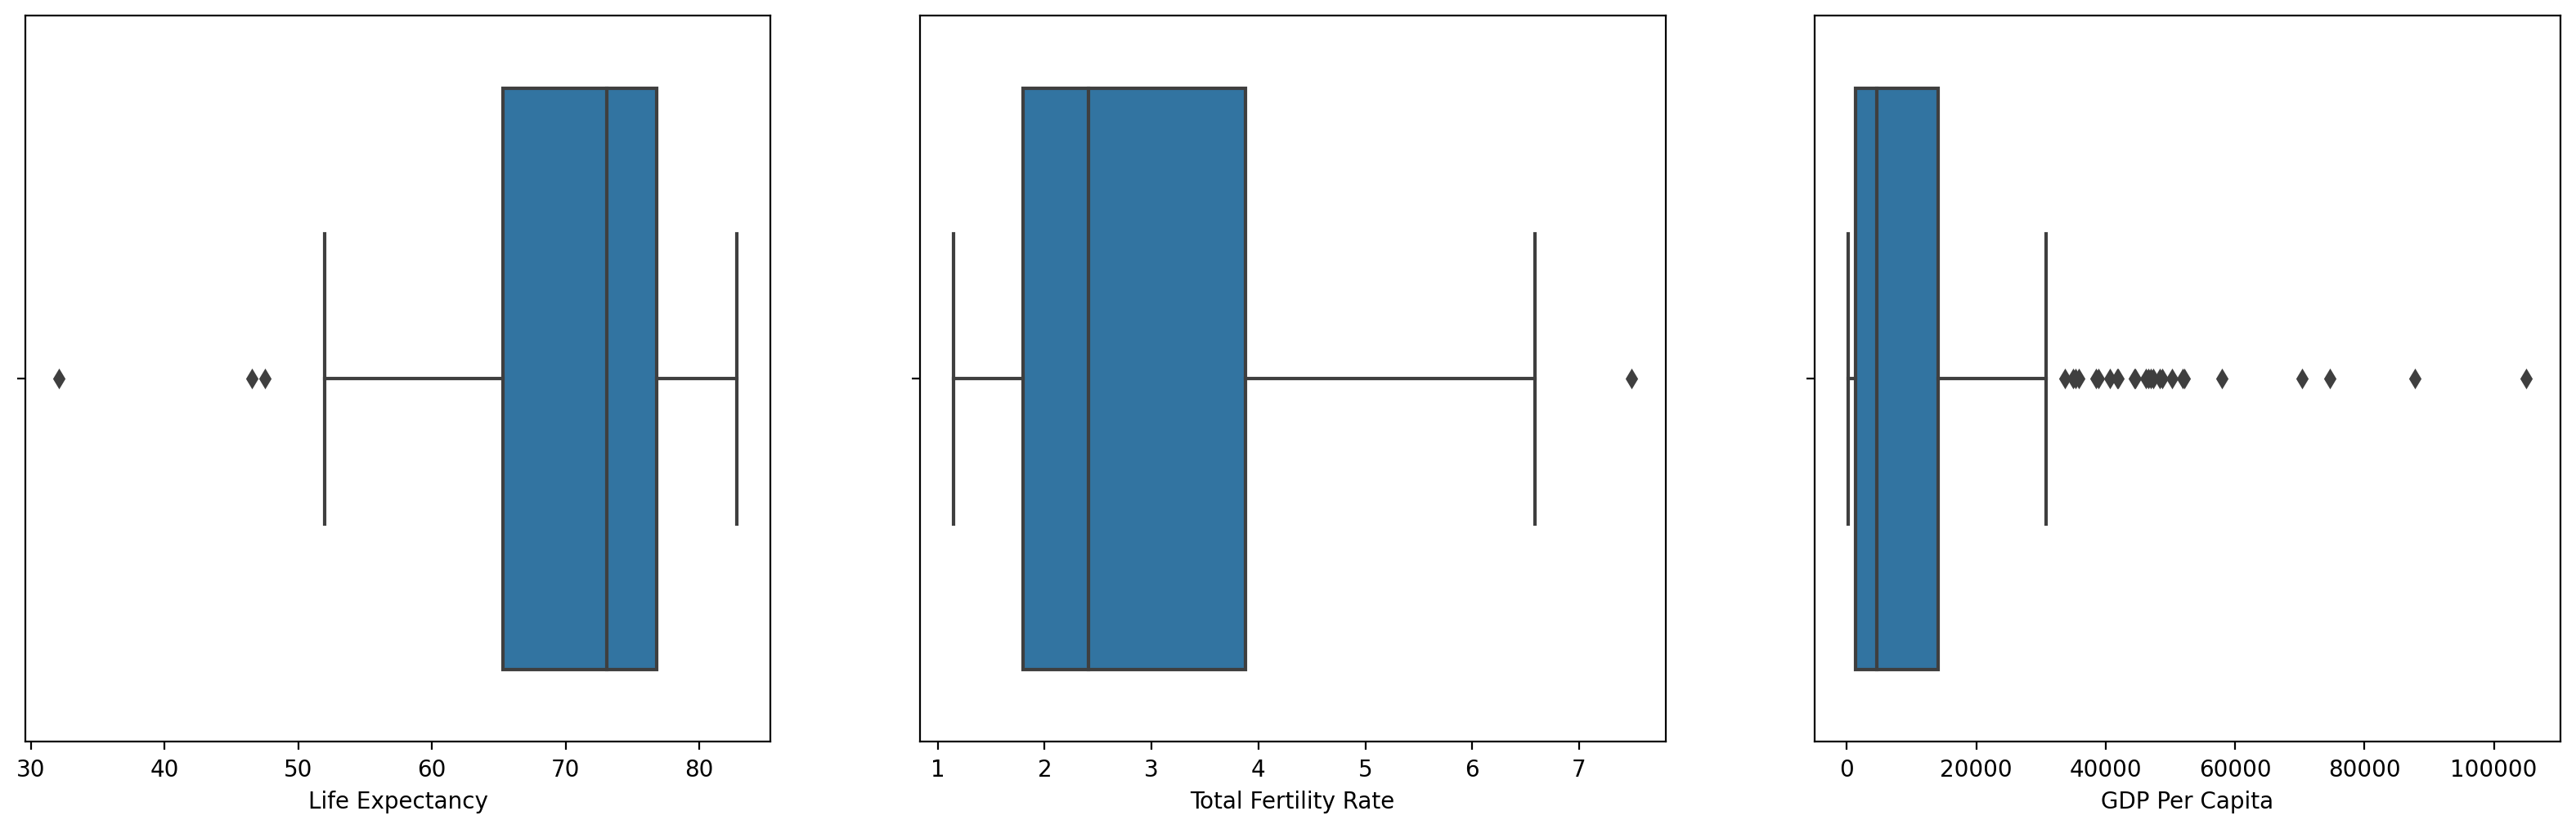

In [9]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='life_expec', data=data)
plt.xlabel('Life Expectancy')


plt.subplot(3,3,2)
sns.boxplot(x='total_fer', data=data)
plt.xlabel('Total Fertility Rate')

plt.subplot(3,3,3)
sns.boxplot(x='gdpp', data=data)
plt.xlabel('GDP Per Capita')



In [10]:
# Custom function to calculate z-score
def z_score(values):
    mean = np.mean(values)
    std = np.std(values)
    z_scores = [(x - mean) / std for x in values]
    return z_scores
z_custom = np.array([z_score(data['child_mort'])])
np.abs(z_custom)

array([[1.29153238, 0.5389489 , 0.27283273, 2.00780766, 0.69563412,
        0.5911773 , 0.50164289, 0.8324228 , 0.84485813, 0.02312823,
        0.60858677, 0.73791425, 0.27680906, 0.5986385 , 0.81501333,
        0.839884  , 0.48423342, 1.8088423 , 0.11017558, 0.20717119,
        0.78019439, 0.35390814, 0.45936275, 0.69065998, 0.68319878,
        1.93319565, 1.37609265, 0.15245571, 1.73423029, 0.81252626,
        0.29272927, 2.75392774, 2.77879841, 0.73542719, 0.5613325 ,
        0.48920756, 1.24179104, 1.93319565, 0.63743377, 0.69812118,
        1.8088423 , 0.81501333, 0.8622676 , 0.86724173, 0.84983227,
        0.09625098, 0.32754821, 0.22806553, 0.47428516, 1.8088423 ,
        0.42105895, 0.839884  , 0.35241888, 0.87719   , 0.8473452 ,
        0.63245964, 1.04531275, 0.54143596, 0.8473452 , 0.906037  ,
        0.8548064 , 0.58869024, 0.07138031, 1.75910096, 1.88345431,
        0.01666484, 4.22129724, 0.80257799, 0.88713827, 0.51059336,
        0.12360872, 0.47179809, 0.03407431, 0.84

In [11]:
z_score = np.abs(stats.zscore(data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
z_score

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,1.138280,0.279088,0.082455,0.808245,0.157336,1.619092,1.902882,0.679180
1,0.538949,0.479658,0.097016,0.070837,0.375369,0.312347,0.647866,0.859973,0.485623
2,0.272833,0.099122,0.966073,0.641762,0.220844,0.789274,0.670423,0.038404,0.465376
3,2.007808,0.775381,1.448071,0.165315,0.585043,1.387054,1.179234,2.128151,0.516268
4,0.695634,0.160668,0.286894,0.497568,0.101732,0.601749,0.704258,0.541946,0.041817
...,...,...,...,...,...,...,...,...,...
162,0.225578,0.200917,0.571711,0.240700,0.738527,0.489784,0.852161,0.365754,0.546913
163,0.526514,0.461363,0.695862,1.213499,0.033542,3.616865,0.546361,0.316678,0.029323
164,0.372315,1.130305,0.008877,1.380030,0.658404,0.409732,0.286958,0.661206,0.637754
165,0.448417,0.406478,0.597272,0.517472,0.658924,1.500916,0.344633,1.140944,0.637754


In [12]:
data_final = data[(z_score < 3).all(axis=1)]
data_final      

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
data_final.shape

(153, 10)

In [14]:
x_data = data_final.drop('country', axis=1)
y_data = data_final['country']

In [15]:
y_data = data_final['country']
#plt.scatter(x_data[:, :], y_data)


In [16]:
#Trying SkLearn PCA first to see if it works
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x_data)
pca.components_[0]
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
x_pca_final = pca_final.fit_transform(x_data)
x_pca_final

array([[-1.60710495e+04, -2.26902731e+03,  3.21068545e+01,
        -5.96240264e+00],
       [-7.76152598e+03,  1.29287827e+03, -2.67395614e+01,
        -1.06584192e+01],
       [-5.43991453e+03,  3.18173994e+03, -6.14098544e+00,
        -1.68452712e+01],
       [-1.09536929e+04, -1.23019108e+03,  6.48144867e+01,
         3.06593100e+01],
       [ 4.43832240e+03,  2.30521798e+03, -2.00016062e+01,
         6.00065795e+00],
       [ 2.78951135e+03,  3.33055974e+03, -3.83147883e+00,
        -4.36457933e+01],
       [-1.06240807e+04, -4.37903186e+02, -3.06239826e+01,
        -1.54284240e+01],
       [ 4.85335524e+04, -9.05219892e+03,  8.26586075e+00,
        -2.67416349e+01],
       [ 4.61678638e+04, -4.29362533e+03,  8.40084229e+00,
         7.97847167e+00],
       [-2.29899642e+03,  4.46584262e+03,  1.36764229e+01,
        -1.27332084e+01],
       [ 1.84770058e+04, -5.87986408e+03, -1.49389172e+01,
        -1.49003519e+00],
       [ 2.57946316e+04,  1.23130453e+04,  2.59656211e+01,
      

In [17]:
#KMeans class
class KMeansCustom:
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters

    def fit(self, X): 
        n_inits = 5 
        jobs = []
        for init in range(n_inits):            
            cluster_centers = X[np.random.randint(0, len(X), self.n_clusters)]        
            for step in range(10):
                vote = []
                error = 0
                for point in X:
                    distances = np.sum((cluster_centers - point) ** 2, axis=1) ** .5
                    vote.append(distances.argmin())
                    error += distances[distances.argmin()]
                npvote = np.array(vote)
                for i in range(self.n_clusters):
                    cluster_centers[i] = (X[npvote == i]).mean(axis=0)            
            jobs.append([error, cluster_centers, npvote])
        
        idx = np.array([job[0] for job in jobs]).argmin()
        
        error, cluster_centers, npvote = jobs[idx]
        
        self.labels_ = npvote
        self.cluster_centers_ = cluster_centers

/home/Divyansh/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exports', ylabel='child_mort'>

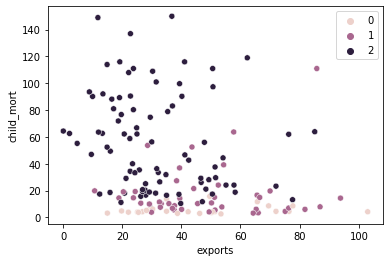

In [18]:
model = KMeansCustom(3)

model.fit(x_data.to_numpy())

sns.scatterplot(x_data.iloc[:, 1], x_data.iloc[:, 0], hue=model.labels_)
# for center in model.cluster_centers_:
#     [xi, yi] = center
#     plt.scatter(xi, yi, s=120, marker="^")

/home/Divyansh/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

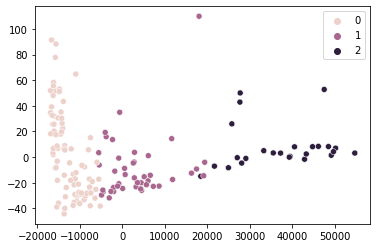

In [19]:
model2 = KMeansCustom(3)

model.fit(x_pca_final)

sns.scatterplot(x_pca_final[:, 0], x_pca_final[:, 2], hue=model.labels_)

<AxesSubplot:ylabel='gdpp'>

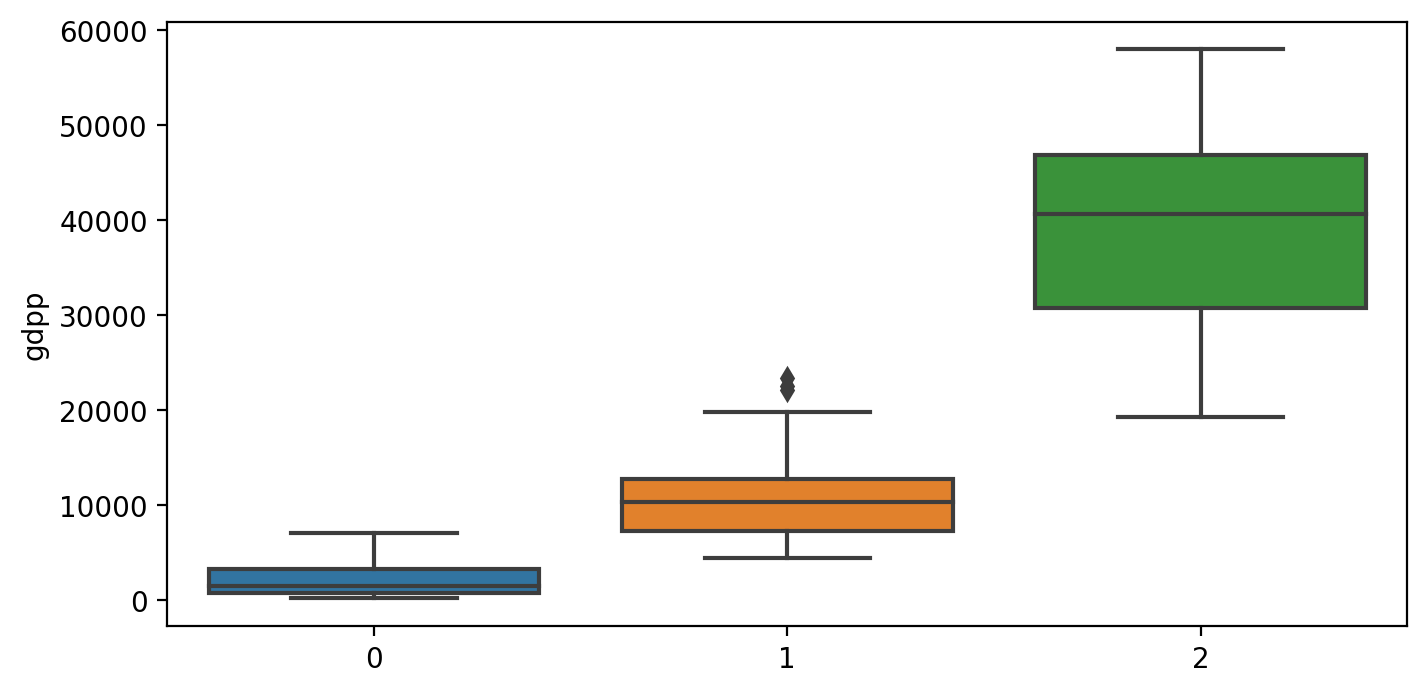

In [20]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=model.labels_, y='gdpp', data=x_data)

/home/Divyansh/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='child_mort', ylabel='health'>

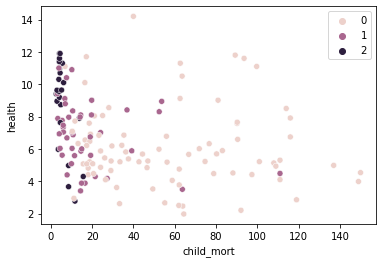

In [21]:
sns.scatterplot(x_data.iloc[:, 0], x_data.iloc[:, 2], hue=model.labels_)